In [1]:
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot as plt
import seaborn as sns
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import gap_stats

# Generate data
Let's generate a 2D dataset of 10 (clear) clusters.

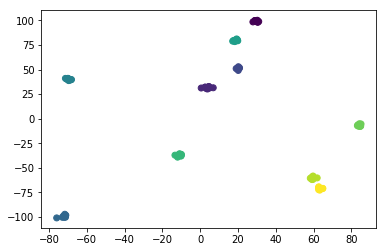

In [2]:
x, y = make_blobs(100, n_features=2, centers=10, center_box=[-100, 100], random_state=1024)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()

The gap statistics of kmeans shows the optimal number of clusters to be 10.

best number of clusters = 10


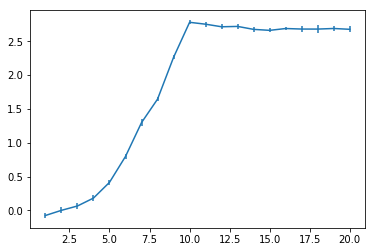

In [3]:
gaps = gap_stats.get_gaps_kmeans(x, max_k=20, n_iters=10)

print('best number of clusters = {0}'.format(gap_stats.get_best_k(gaps, minimal_k=True)))

plt.errorbar(range(1, 21), 
             [g.gap for g in gaps], 
             [g.error for g in gaps])
plt.show()

Suppose we don't want to use K-means or GMM (which are natively supported), we could pass the clustering algorithm to the `get_gaps` methods to compute the gap statistics. Such an algorithm should follow `scikit-learn` standard: it should have the methods `fit()` and `predict()`.

Here we are trying Hierarchical clustering algorithm (AgglomerativeClustering).

best number of clusters = 10


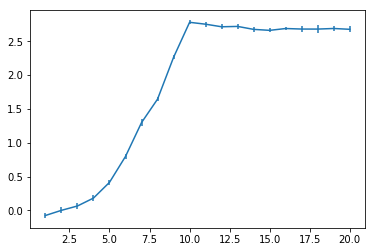

In [5]:
from sklearn.cluster import AgglomerativeClustering

# Pass the clustering algorithm here
gap_stats.get_gaps(x, cluster_algo=AgglomerativeClustering, max_k=20, n_iters=10)

print('best number of clusters = {0}'.format(gap_stats.get_best_k(gaps, minimal_k=True)))

plt.errorbar(range(1, 21), 
             [g.gap for g in gaps], 
             [g.error for g in gaps])
plt.show()